**PROBLEM STATEMENT**
    Given a dataset containing information about Instagram posts and their respective reach metrics collected over time, the task is to develop a machine learning model to analyze and predict the reach of future Instagram posts. The goal is to understand the factors influencing post reach and create a predictive model that can estimate the potential reach of a new post based on its attributes.

# INTRODUCTION

Instagram is a popular social media platform for sharing experiences, expressing creativity, and connecting with diverse communities. It's a powerful tool for individuals and businesses to engage with their audience. Reach analysis is crucial for content creators to optimize their reach and adapt strategies, ensuring their posts reach their audience effectively.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [5]:
data = pd.read_csv("Instagram data.csv", encoding = 'latin1')

In [6]:
data

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follows  \
0           9       5    162              35        2   
1           7      14    224              48       10   
2          11       1    131              62       12   
3          10       7    213              23        8   
4           5       4    123               8        0   
..        ...     ...    ...             ...      ...   
114         2      38    373              73       80   
115         4       1    148              20       18   
116         0       1     92              34       10   
117         2      75    549             148      214   
118         5      26    443             611      228   

                                               Caption  \
0    Here are some of the most important data visua...   
1    Here are some of the best data science project...   
2    Learn how to train a machine learning model an...   
3    Heres how you can write a Python program to d...   
4    Plotting annotations while visualizing your da...   
..                                                 ...   
114  Here are some of the best data science certifi...   
115  Clustering is a machine learning technique use...   
116  Clustering music genres is a task of grouping ...   
117  Here are some of the best data science certifi...   
118  175 Python Projects with Source Code solved an...   

                                              Hashtags  
0    #finance #money #business #investing #investme...  
1    #healthcare #health #covid #data #datascience ...  
2    #data #datascience #dataanalysis #dataanalytic...  
3    #python #pythonprogramming #pythonprojects #py...  
4    #datavisualization #datascience #data #dataana...  
..                                                 ...  
114  #datascience #datasciencejobs #datasciencetrai...  
115  #machinelearning #machinelearningalgorithms #d...  
116  #machinelearning #machinelearningalgorithms #d...  
117  #datascience #datasciencejobs #datasciencetrai...  
118  #python #pythonprogramming #pythonprojects #py...  

[119 rows x 13 columns]

###### look at whether this dataset contains any null values or not:

In [7]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

###### data type of all the columns:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


##### analyzing the reach of Instagram posts

###### distribution of impressions received from home:

C:\Users\User\AppData\Local\Temp\ipykernel_2788\4127021947.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


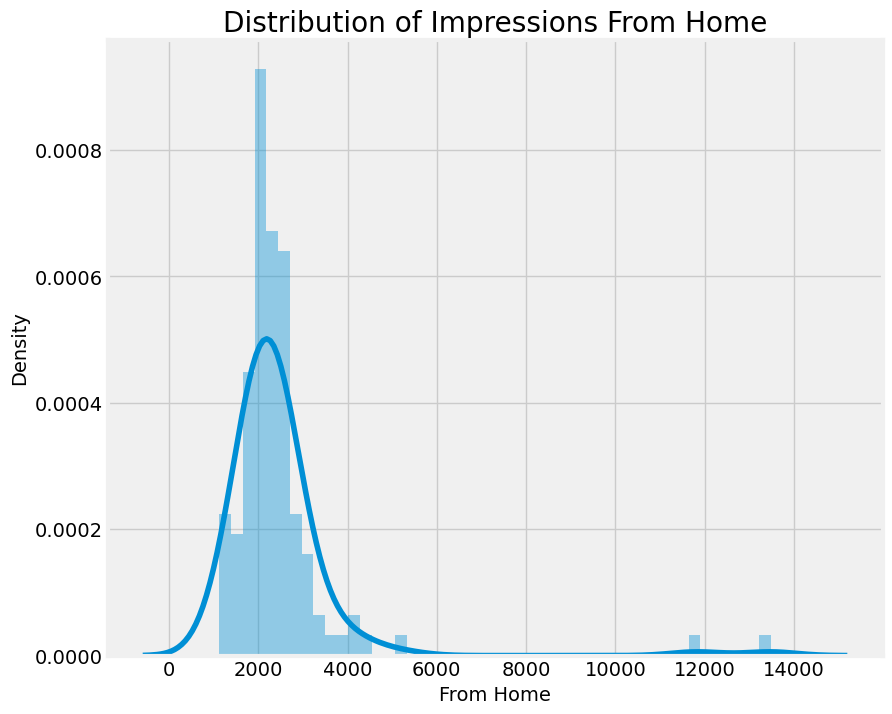

In [9]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

- shows how much my posts reach my followers
- hence it’s hard to reach all my followers daily

###### distribution of the impressions I received from hashtags

C:\Users\User\AppData\Local\Temp\ipykernel_2788\671336047.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


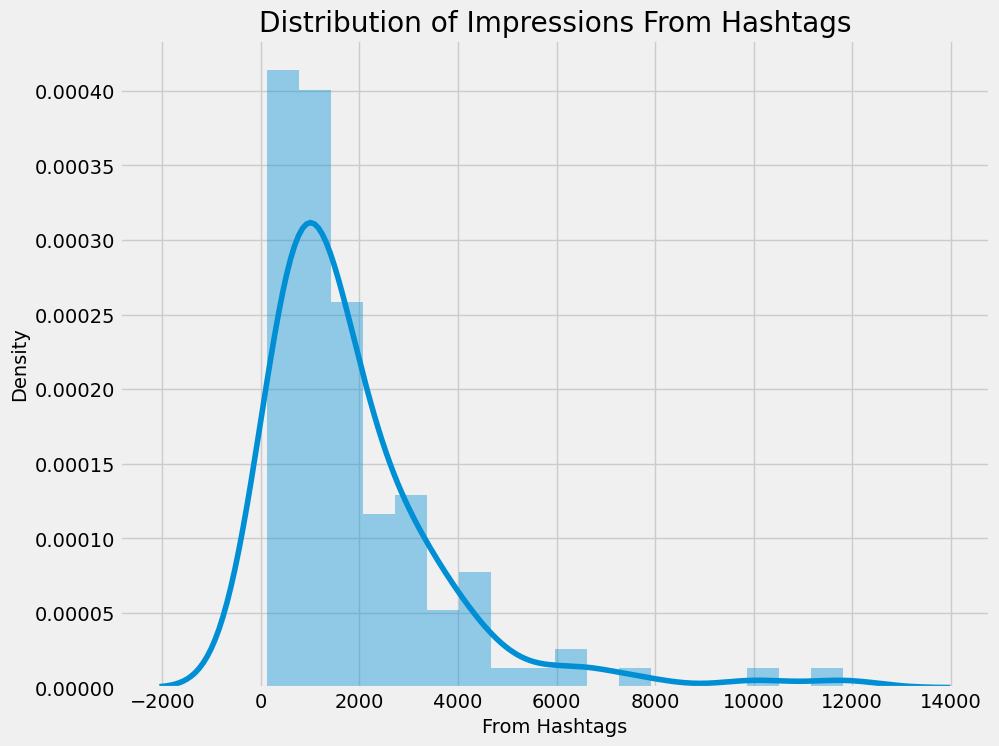

In [10]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags.

###### distribution of impressions received from the explore section of Instagram

C:\Users\User\AppData\Local\Temp\ipykernel_2788\2610232579.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


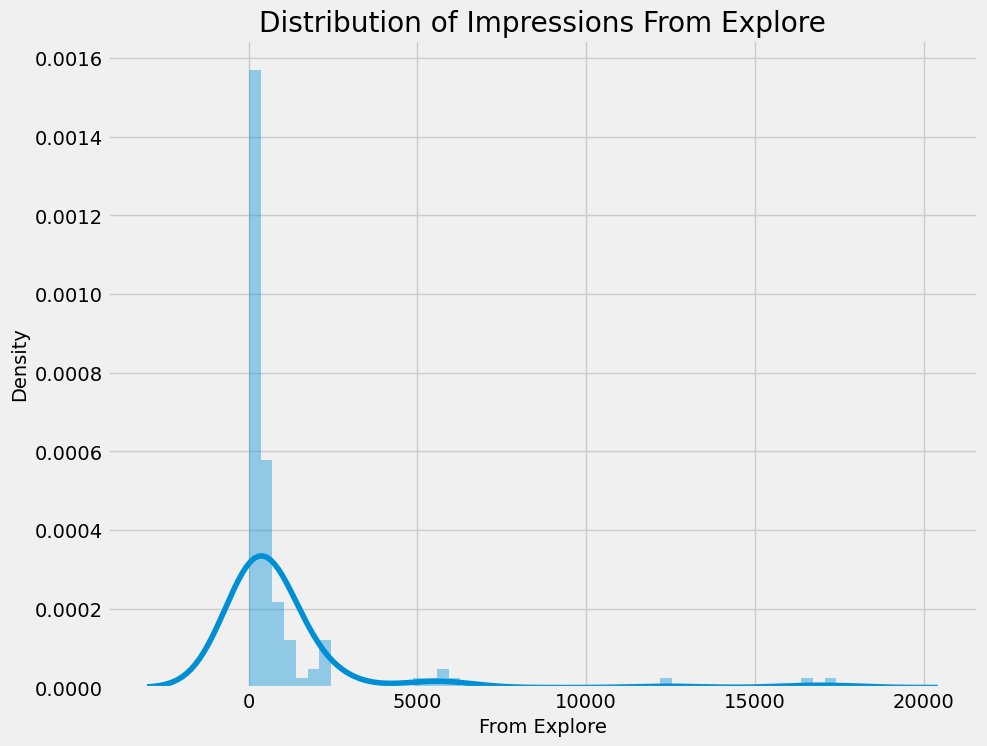

In [11]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests. By looking at the impressions received from the explore section, Instagram does not recommend our posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach I receive from hashtags.

###### the percentage of impressions get from various sources on Instagram

In [12]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

- It shows that almost 50 percent of the reach is from my followers, 38.1 percent is from hashtags, 9.14 percent is from the explore section, and 3.01 per cent is from other sources.

###### Analyzing Content

    The dataset has two columns,
        - caption and
        - hashtags, 
    which will help us understand the kind of content I post on Instagram.

###### most used words in the caption of Instagram posts

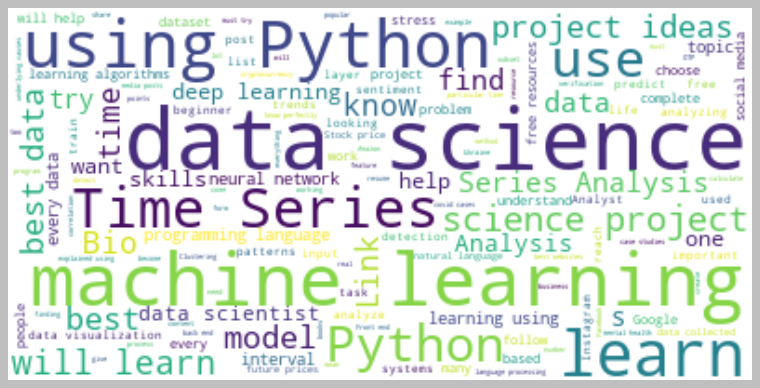

In [14]:
text = " ".join(i for i in data["Caption"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color = "white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###### create a wordcloud of the hashtags column to look at the most used hashtags in  Instagram posts

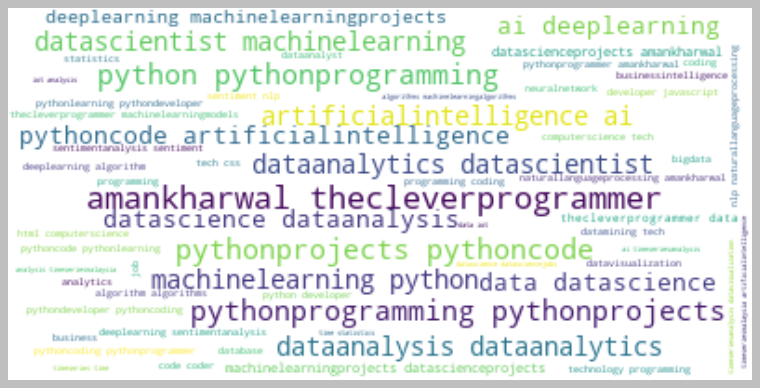

In [15]:
text = " ".join(i for i in data["Hashtags"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Analyzing Relationships

    analyze relationships to find the most important factors of our Instagram reach
    It will also help us in understanding how the Instagram algorithm works

###### relationship between the number of likes and the number of impressions on Instagram posts

In [18]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

- There is a linear relationship between the number of likes and the reach got on Instagram. 

###### relationship between the number of comments and the number of impressions on Instagram posts

In [17]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

-  the number of comments we get on a post doesn’t affect its reach

###### relationship between the number of shares and the number of impressions

In [19]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

- A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do. 

###### the relationship between the number of saves and the number of impressions

In [20]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

- There is a linear relationship between the number of times my post is saved and the reach of Instagram post.

###### correlation of all the columns with the Impressions column

In [21]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_2788\3935629544.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



- more likes and saves will help you get more reach on Instagram
- the higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either

###### Analyzing Conversion Rate

    In Instagram, conversation rate means how many followers getting from the number of profile visits from a post.
        conversion rate = (Follows/Profile Visits) * 100

In [22]:
# conversation rate of my Instagram account:

conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


- So the conversation rate of my Instagram account is 41% which sounds like a very good conversation rate.

###### relationship between the total profile visits and the number of followers gained from all profile visits

In [23]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

- The relationship between profile visits and followers gained is also linear.

###### Instagram Reach Prediction Model

##### train a machine learning model to predict the reach of an Instagram post

In [24]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])

In [26]:
# split the data into training and test sets

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
# predict the reach of an Instagram post using Python:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8842050118389762

In [28]:
#  predict the reach of an Instagram post by giving inputs to the machine learning model:

# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]

features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([12253.20845129])

###### CONCLUSION

If a content creator wants to do well on Instagram in a long run, they have to look at the data of their Instagram reach. That is where the use of Data Science in social media comes in.